# Mean Reversion -  (Pairs Trading)
- Long Pair: Long stock A and short stock B
- Short Pair: Short stock A and long stock B
- You want to find a high correlation between stock A and B's price (usually > 0.8) --  in this case let's say 0.9. If you find a relationship suggesting that the prices move in opposite directions, you can capitalize on this behavior. ONCE the assets deviate from their typical correlation, say 0.5, you can long/short the pair since you expect the correlation to converge back to its original form.
- Sort of becomes an art when you try to maximize the spread between the assets

# Basic Idea
- 1) Find 2 assets that move similarly with eachother (whether it be a negative or positive correlation)
- 2) Sell the 'overvalued' stock and buy the 'undervalued' stock
-- A common signal to use to triger the purchase of a pair trade is to use the Price Ratio (Stock A / Stock B). If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

In [43]:
# Getting Data from 6 years back
# I will use the most recent 1 year to determine how well I would have done.
# I will get the adjusted close as my main data.
# importing libraries

import pandas as pd
!pip install yfinance
import yfinance as yf
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,BRK-B,MSFT
Date,,,,,,,,,,,,,,,
2021-10-20,455.155334,148.428268,142.414993,116.389999,46.130001,447.496857,625.140015,216.169998,143.703766,65.800003,400.915833,61.087139,157.415619,287.489990,305.503906
2021-10-21,464.465302,148.647034,142.780502,119.330002,45.427502,448.664062,653.159973,214.339996,144.501022,65.400002,400.620911,59.977333,161.121277,286.820007,308.833160
2021-10-22,460.862366,147.861450,138.625000,119.820000,42.450001,448.199158,664.780029,212.970001,146.006958,62.240002,407.235870,60.388729,162.412781,289.239990,307.243042
2021-10-25,462.758118,147.811722,138.772995,122.360001,43.492500,450.602783,671.659973,212.869995,147.699890,62.110001,407.658508,61.565506,163.147949,290.260010,306.219452
2021-10-26,462.301544,148.487946,139.671997,122.930000,44.459999,451.008301,668.520020,209.809998,146.410522,61.430000,410.469574,62.991028,162.720749,290.850006,308.187134


In [44]:
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,BRK-B,MSFT
DPZ,1.000000,0.817113,0.873189,0.665984,0.470365,0.831862,0.374176,0.086539,0.407807,0.338057,0.722899,0.496909,0.812099,0.713556,0.872248
AAPL,0.817113,1.000000,0.819274,0.788376,0.436052,0.834351,0.661147,0.112277,0.372496,0.494680,0.732726,0.505616,0.863150,0.613377,0.887714
GOOG,0.873189,0.819274,1.000000,0.574009,0.720793,0.978323,0.544923,0.345151,0.121214,0.607564,0.934335,0.797337,0.731222,0.903139,0.974968
AMD,0.665984,0.788376,0.574009,1.000000,0.080965,0.556345,0.698317,-0.117422,0.555594,0.222243,0.449067,0.187459,0.814938,0.291650,0.682076
GME,0.470365,0.436052,0.720793,0.080965,1.000000,0.740407,0.245519,0.568174,-0.301088,0.556462,0.805188,0.825334,0.308378,0.802709,0.650929
SPY,0.831862,0.834351,0.978323,0.556345,0.740407,1.000000,0.535352,0.455141,0.119296,0.633441,0.964989,0.847483,0.732732,0.933789,0.955018
NFLX,0.374176,0.661147,0.544923,0.698317,0.245519,0.535352,1.000000,-0.018422,0.106457,0.389575,0.483716,0.374681,0.504768,0.307144,0.653423
BA,0.086539,0.112277,0.345151,-0.117422,0.568174,0.455141,-0.018422,1.000000,-0.305433,0.538535,0.521853,0.680283,0.091471,0.577541,0.241204
WMT,0.407807,0.372496,0.121214,0.555594,-0.301088,0.119296,0.106457,-0.305433,1.000000,-0.392984,-0.042244,-0.320161,0.399169,-0.005361,0.187620
TWTR,0.338057,0.494680,0.607564,0.222243,0.556462,0.633441,0.389575,0.538535,-0.392984,1.000000,0.669415,0.706168,0.467765,0.568239,0.603405


<AxesSubplot:>

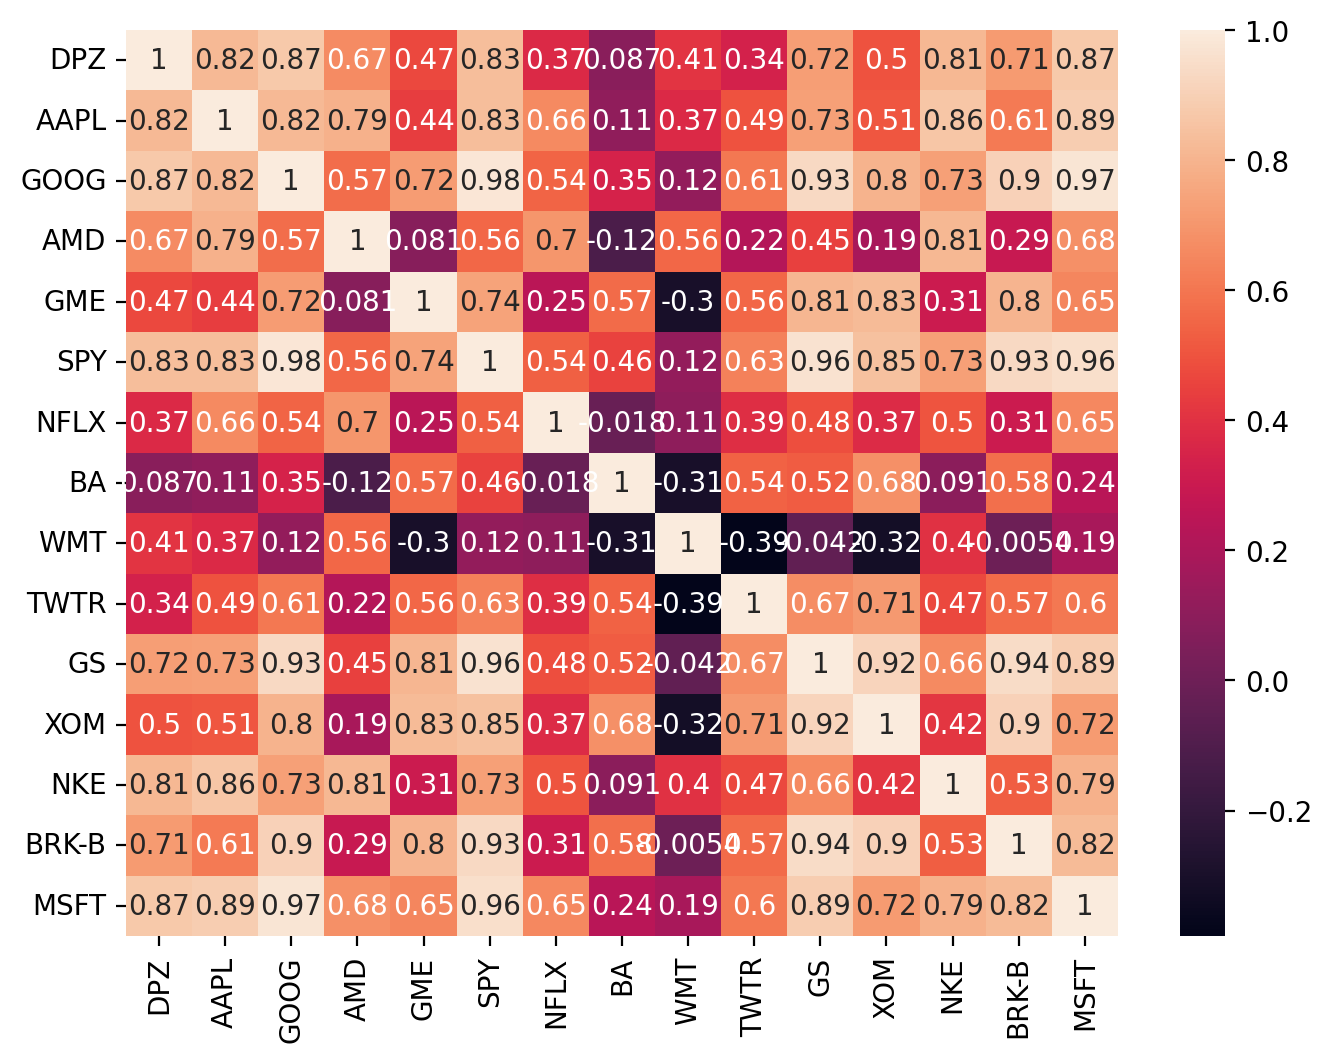

In [45]:
# Visualizing the correlations as a heatmap to get a better idea 
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

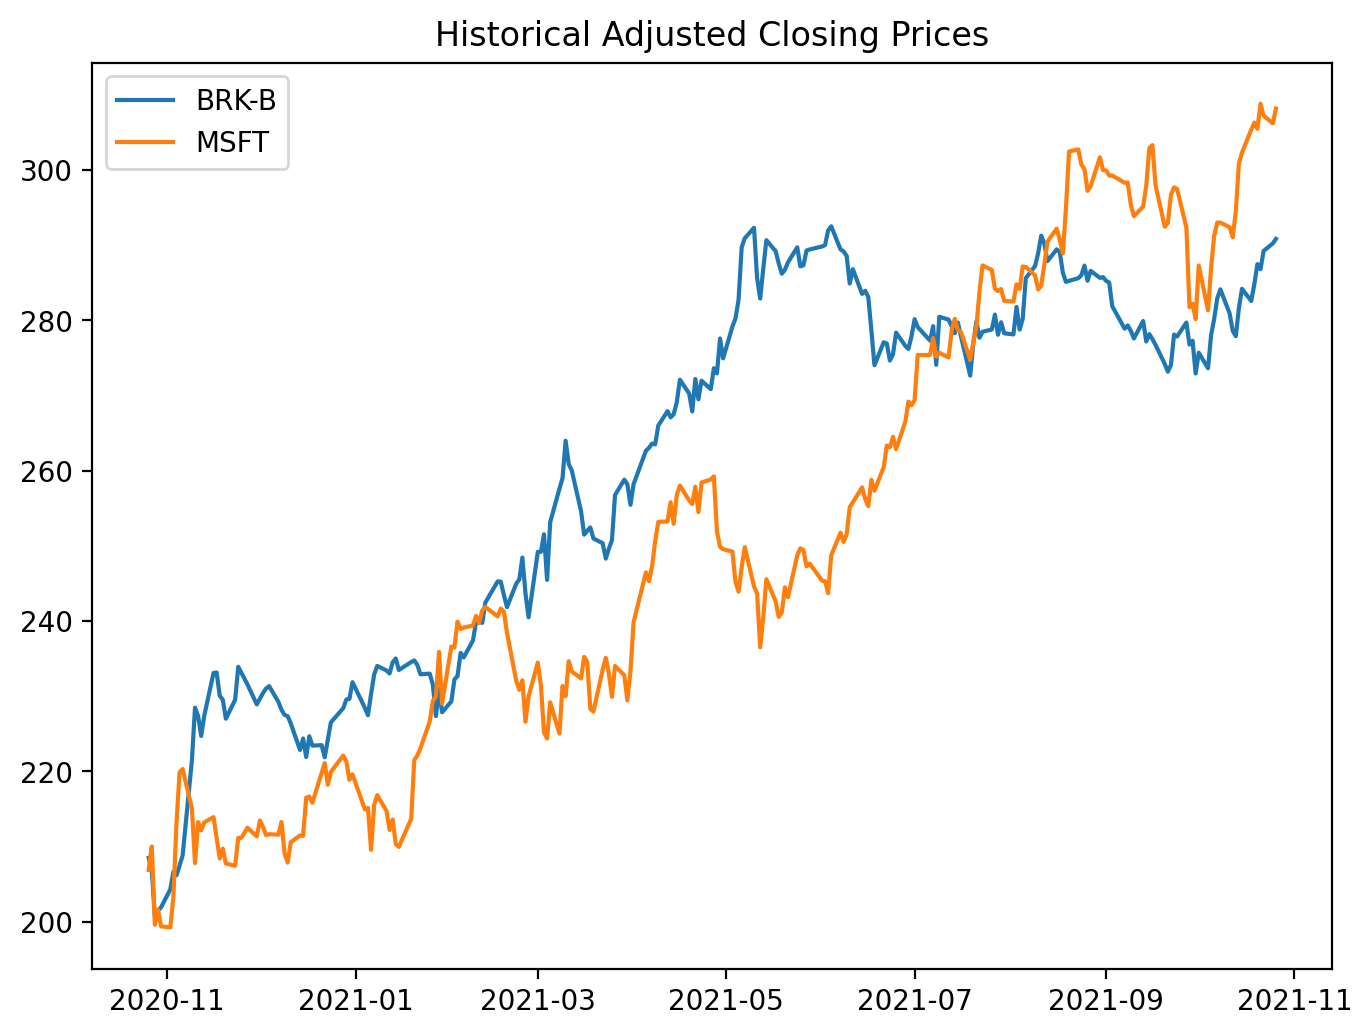

In [46]:
# Correlation of Birkshire B and Microsoft ~ 0.82.
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B']
MSFT = d['MSFT']
plt.plot(BRK_B, label = "BRK-B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
# More reasonable.

Text(0.5, 1.0, 'Spread between BRK-B and MSFT')

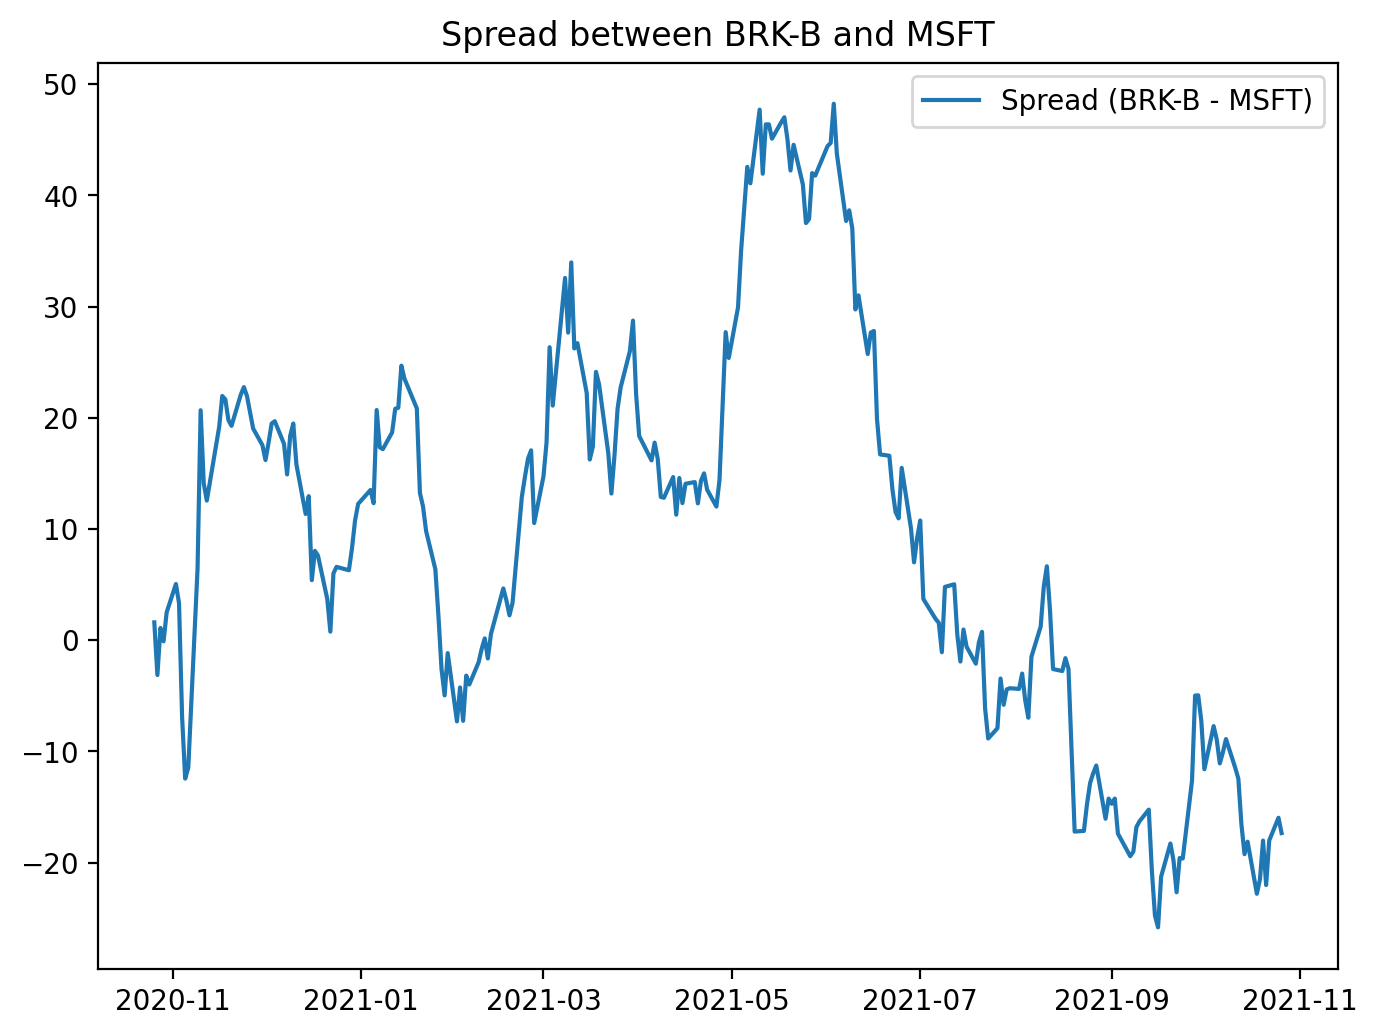

In [47]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between BRK-B and MSFT")

In [48]:
# Checking out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

In [49]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.

cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.4998648437598431


In [50]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.42951053587806975
P value for the Augmented Dickey-Fuller Test is 0.9004560592366683
P value for the Augmented Dickey-Fuller Test is 0.5771023107491627
P value for the Augmented Dickey-Fuller Test is 0.46749655427852976


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

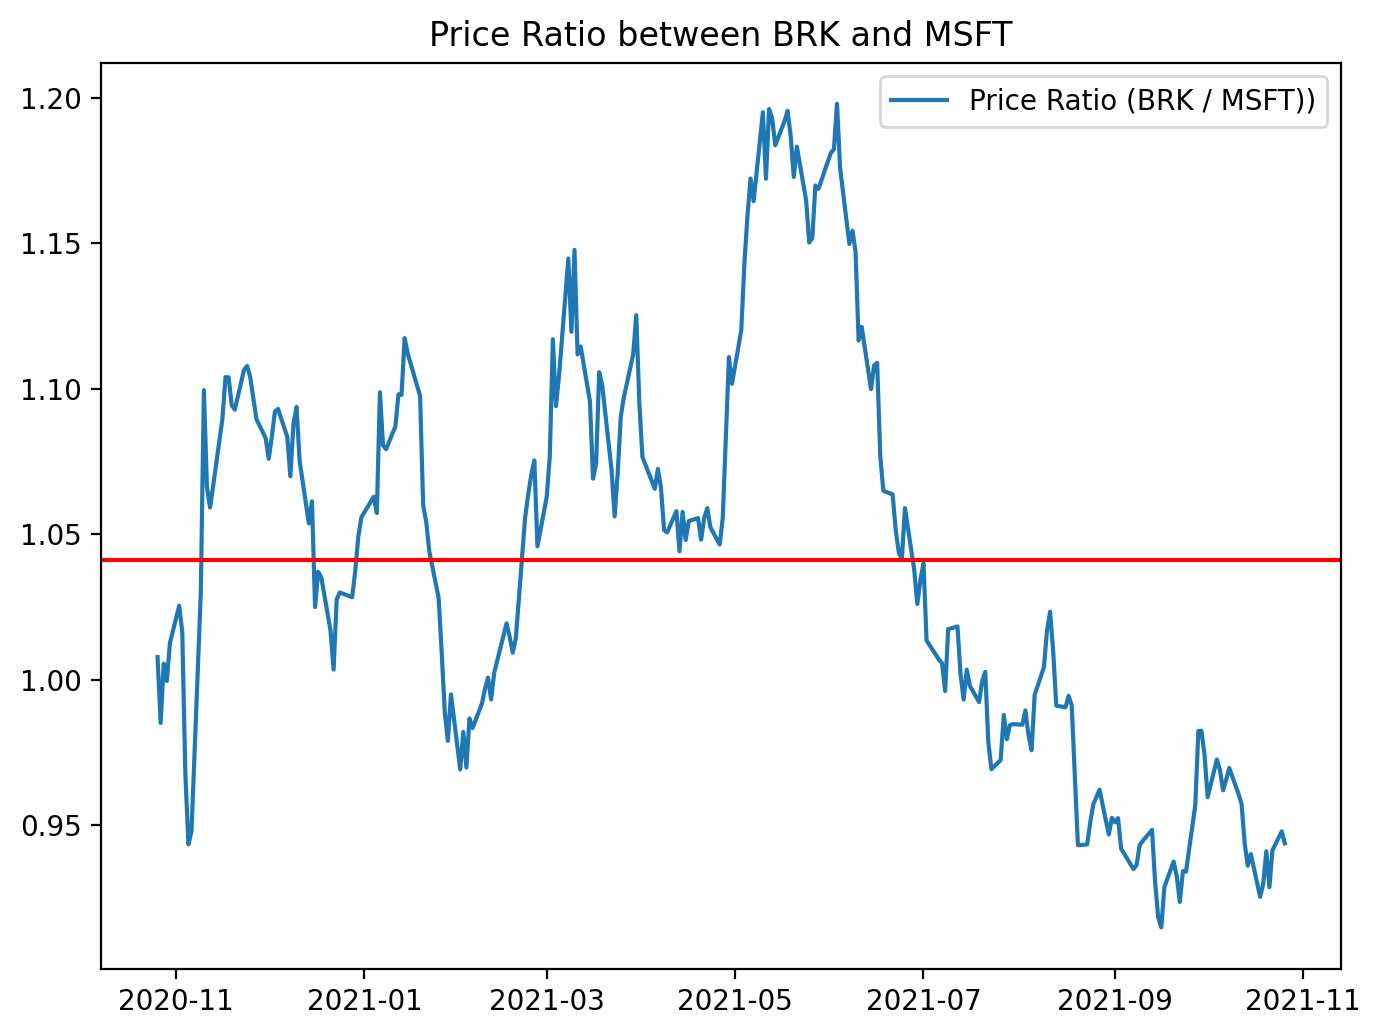

In [51]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

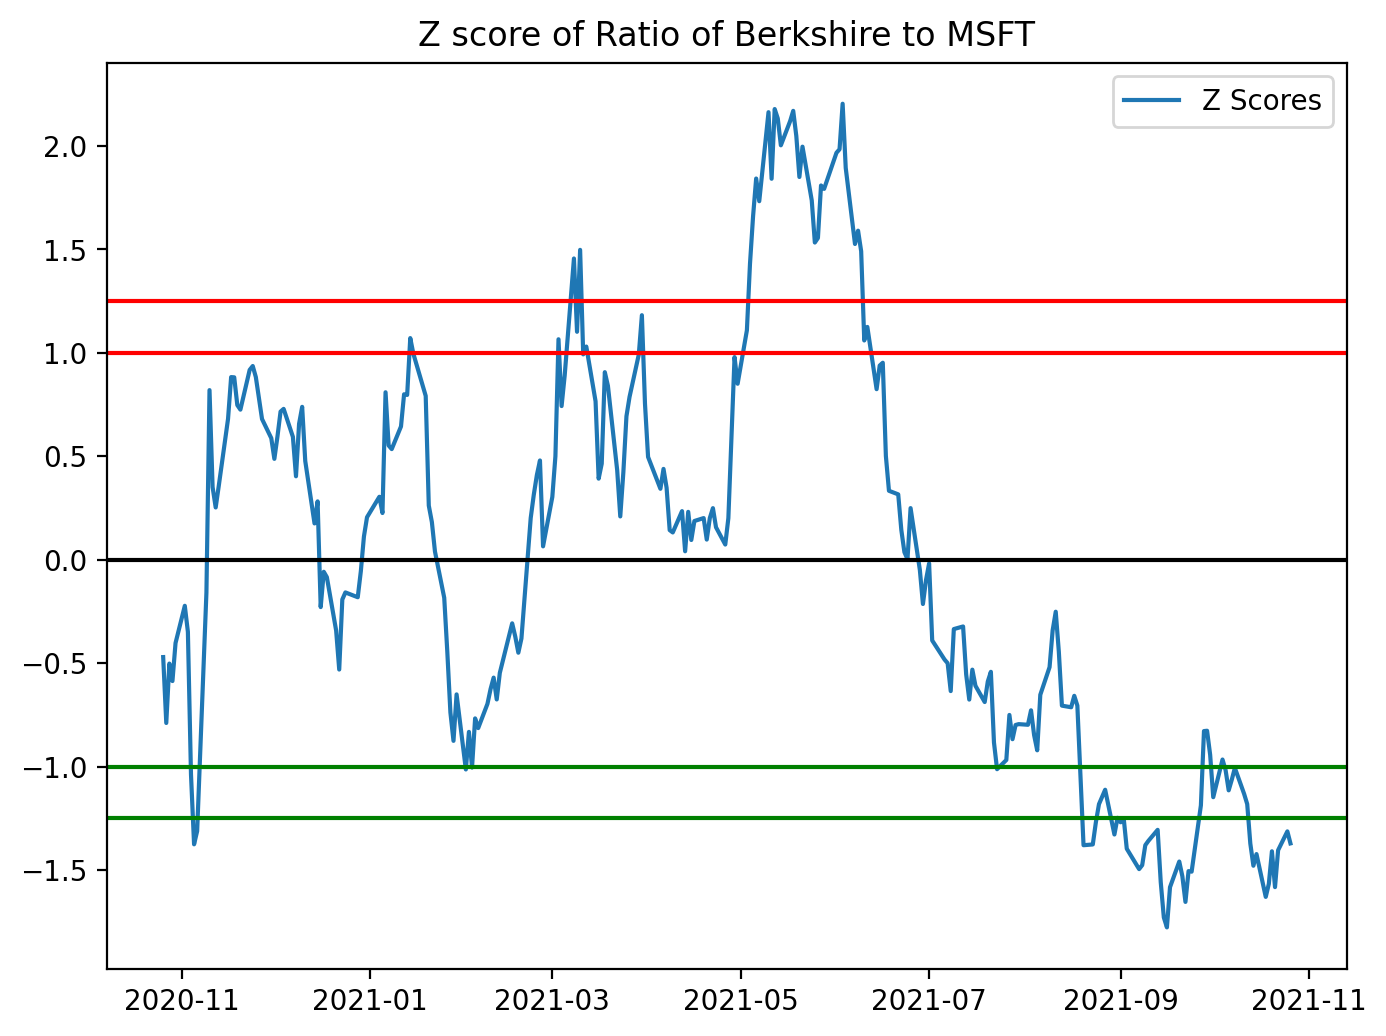

In [52]:
# let's standardize the ratio so we can have a upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

In [53]:
# We need some form of 'signal' to trade

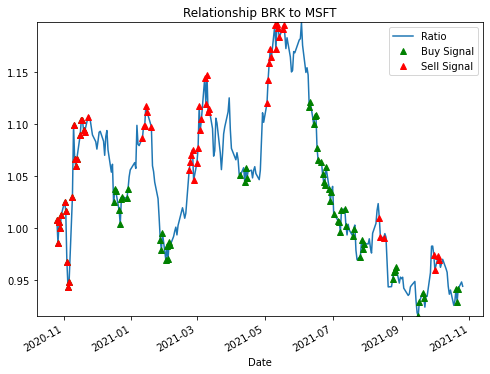

In [54]:
figure(figsize=(8, 6))
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()